#Group 7

**Sales Prediction using decision tree and SVM**

#Data Preprocessing

##**1. Import libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.ensemble import HistGradientBoostingRegressor

##**2. Load your dataset**


In [ ]:
#Get your dataset into our working directory
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving MLDM Data - Data.csv to MLDM Data - Data.csv
User uploaded file "MLDM Data - Data.csv" with length 166450 bytes


In [ ]:
# Load the dataset from a CSV file
Dataset = pd.read_csv('/content/MLDM Data - Data.csv')

##**3. Visualised your dataset**

In [ ]:
# Display the first few rows of the loaded dataset
Dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Product_Category,Temperature,CPI,Size
0,1,1,02/05/10,24924.50,False,Category_028,42.31,211.096358,S
1,1,1,02/12/10,46039.49,True,Category_028,38.51,211.242170,M
2,1,1,2/19/2010,41595.55,False,Category_028,39.93,211.289143,L
3,1,1,2/26/2010,19403.54,False,Category_028,46.63,211.319643,XL
4,1,1,03/05/10,21827.90,False,Category_028,46.50,211.350143,L


In [ ]:
#summary of the data
Dataset.describe()

,Store,Dept,Weekly_Sales,Temperature,CPI
count,2687.0,2687.000000,2687.000000,2687.000000,2505.000000
mean,1.0,10.176777,21364.935862,62.819233,186.456437
std,0.0,5.795954,15000.445320,17.882411,40.446014
min,1.0,1.000000,-139.650000,-7.290000,126.064000
25%,1.0,5.000000,8846.275000,50.245000,131.980900
50%,1.0,10.000000,18717.530000,64.210000,211.613505
75%,1.0,16.000000,34157.095000,78.035000,219.445767
max,1.0,20.000000,166697.720000,101.950000,228.976456


In [ ]:
#Check if there a missing values
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store             2687 non-null   int64  
 1   Dept              2687 non-null   int64  
 2   Date              2687 non-null   object 
 3   Weekly_Sales      2687 non-null   float64
 4   IsHoliday         2687 non-null   bool   
 5   Product_Category  2687 non-null   object 
 6   Temperature       2687 non-null   float64
 7   CPI               2505 non-null   float64
 8   Size              2687 non-null   object 
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 170.7+ KB


Product_Category and Date are a combination of string and int hence categorized as object.

Size is also categorized as an object

In [ ]:
# Get the shape of the dataset
Dataset.shape

(2687, 9)

In [ ]:
# Check for any missing values
print("Missing Values:\n", Dataset.isnull().sum())  # Count of missing values in each column

Missing Values:
 Store                 0
Dept                  0
Date                  0
Weekly_Sales          0
IsHoliday             0
Product_Category      0
Temperature           0
CPI                 182
Size                  0
dtype: int64


In [ ]:
# Check for any duplicate rows
print("Duplicate Rows:", Dataset.duplicated().sum())  # Count of duplicate rows

Duplicate Rows: 0


CPI is the average Cost Per Item
We can replace the CPI to be the mean of CPI

Since there are no duplicates, no action is needed

In [ ]:
# Handle missing values (if any)
# For example, fill missing values with the mean of the column
Dataset.fillna(Dataset.mean(), inplace=True)

<ipython-input-13-dbc7208903d9>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Dataset.fillna(Dataset.mean(), inplace=True)


In [ ]:
# Check for any missing values again
print("Missing Values:\n", Dataset.isnull().sum())  # Count of missing values in each column

Missing Values:
 Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday           0
Product_Category    0
Temperature         0
CPI                 0
Size                0
dtype: int64


All missing values have been replaced

In [ ]:
# Check for missing values in the dataset
Dataset.isna().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday           0
Product_Category    0
Temperature         0
CPI                 0
Size                0
dtype: int64

In [ ]:
# Get the shape of the dataset
Dataset.shape

(2687, 9)

In [ ]:
# Display the first few rows of the loaded dataset
Dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Product_Category,Temperature,CPI,Size
0,1,1,02/05/10,24924.50,False,Category_028,42.31,211.096358,S
1,1,1,02/12/10,46039.49,True,Category_028,38.51,211.242170,M
2,1,1,2/19/2010,41595.55,False,Category_028,39.93,211.289143,L
3,1,1,2/26/2010,19403.54,False,Category_028,46.63,211.319643,XL
4,1,1,03/05/10,21827.90,False,Category_028,46.50,211.350143,L


In [ ]:
#need to convert isHoliday and Size into numerical data
from sklearn.preprocessing import LabelEncoder

# Create a new instance of LabelEncoder
encoder = LabelEncoder()

Dataset['IsHoliday'] = encoder.fit_transform(Dataset['IsHoliday'])


In [ ]:
# Create a new instance of LabelEncoder
encoder_size = LabelEncoder()

Dataset['Size'] = encoder_size.fit_transform(Dataset['Size'])

In [ ]:
# Display the first few rows of the loaded dataset
Dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Product_Category,Temperature,CPI,Size
0,1,1,02/05/10,24924.50,0,Category_028,42.31,211.096358,2
1,1,1,02/12/10,46039.49,1,Category_028,38.51,211.242170,1
2,1,1,2/19/2010,41595.55,0,Category_028,39.93,211.289143,0
3,1,1,2/26/2010,19403.54,0,Category_028,46.63,211.319643,3
4,1,1,03/05/10,21827.90,0,Category_028,46.50,211.350143,0


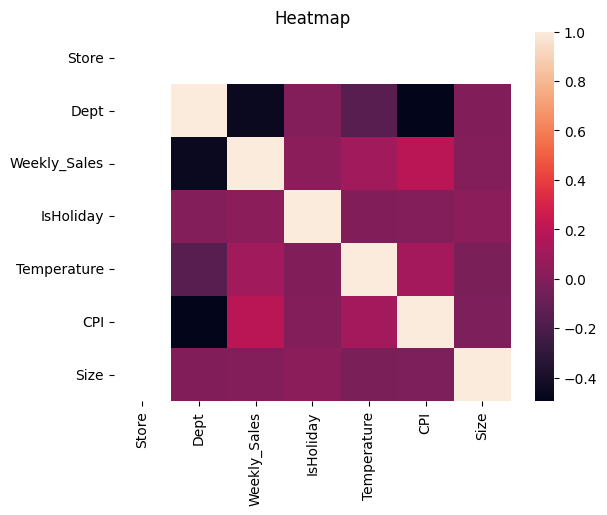

In [ ]:
# create a heatmap in seaborn to see which varaibles are highly correlated with y
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(Dataset.corr())
plt.title('Heatmap')
plt.show()

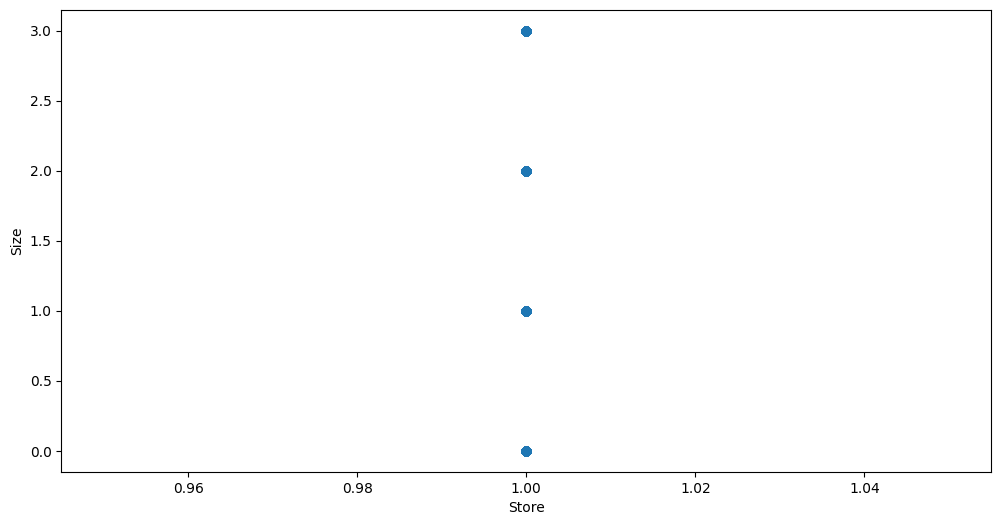

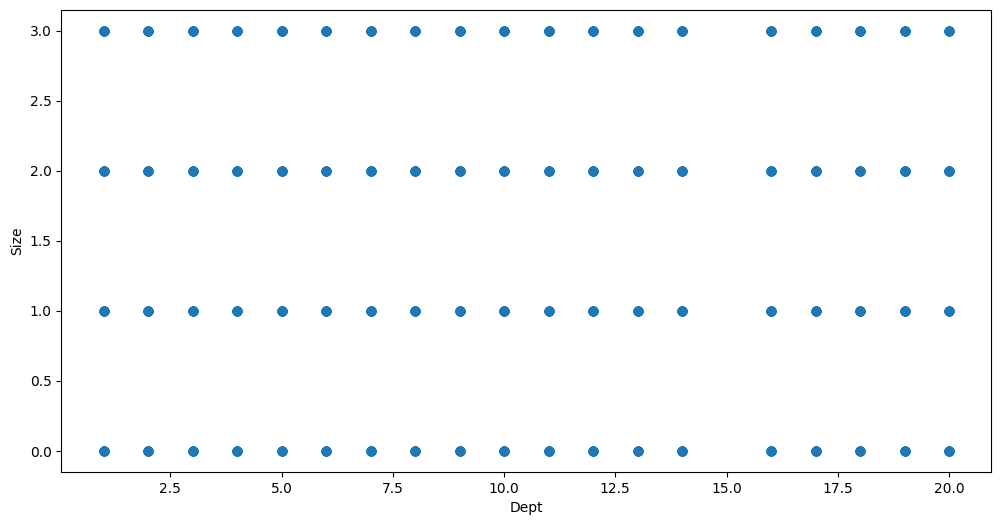

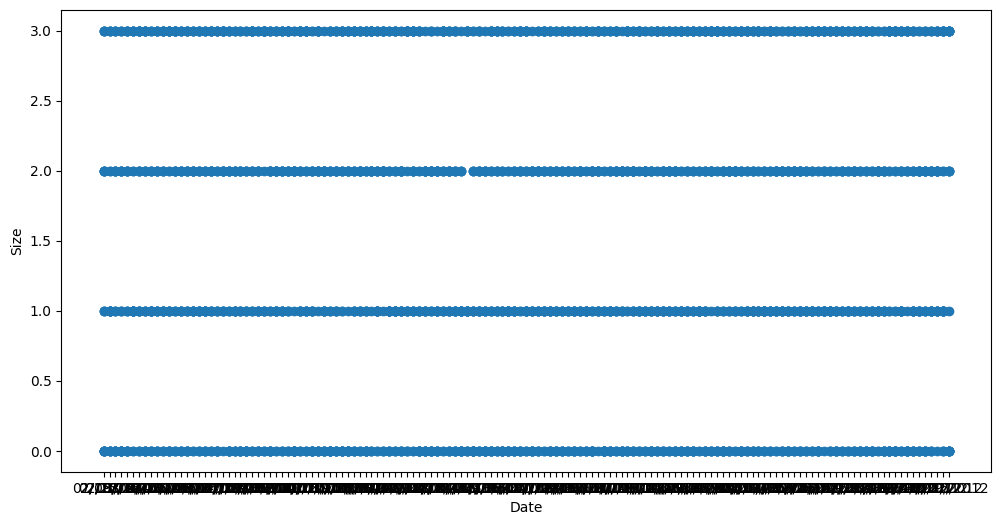

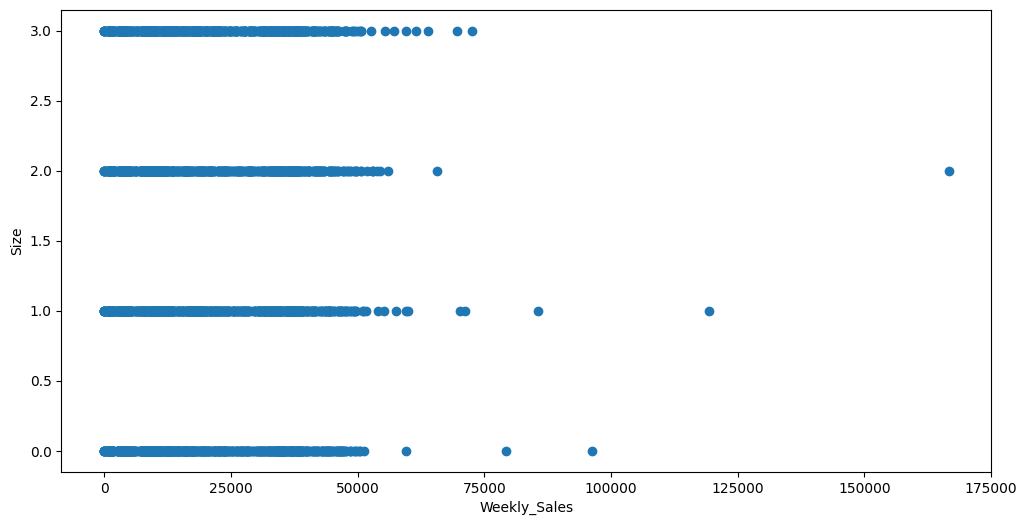

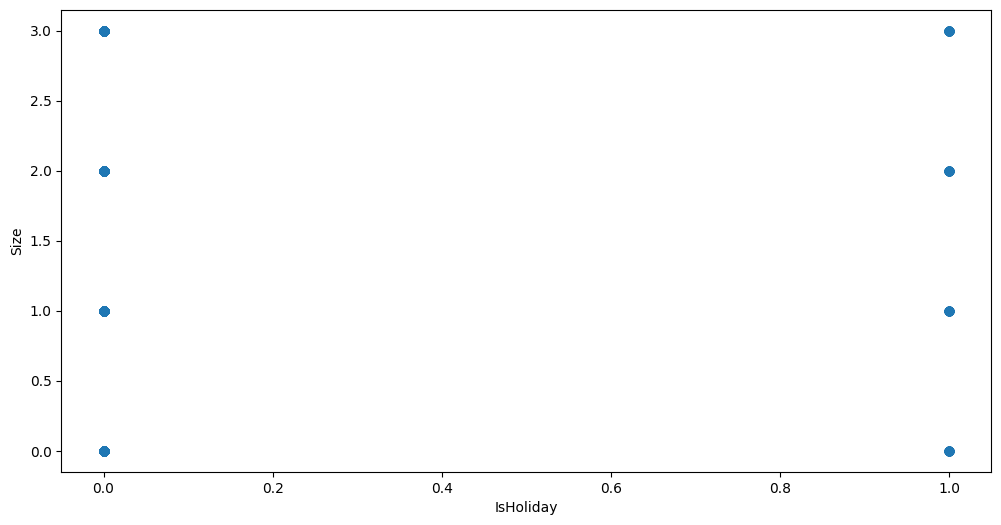

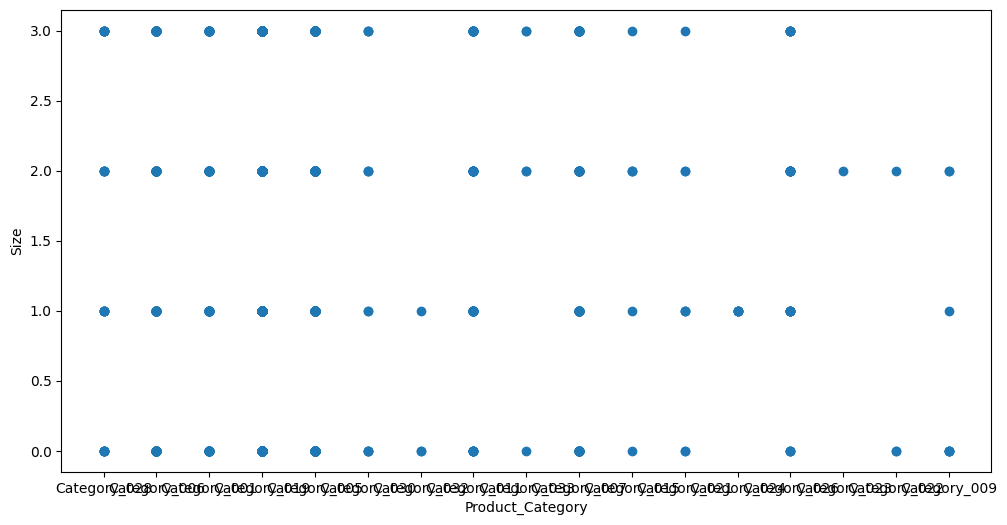

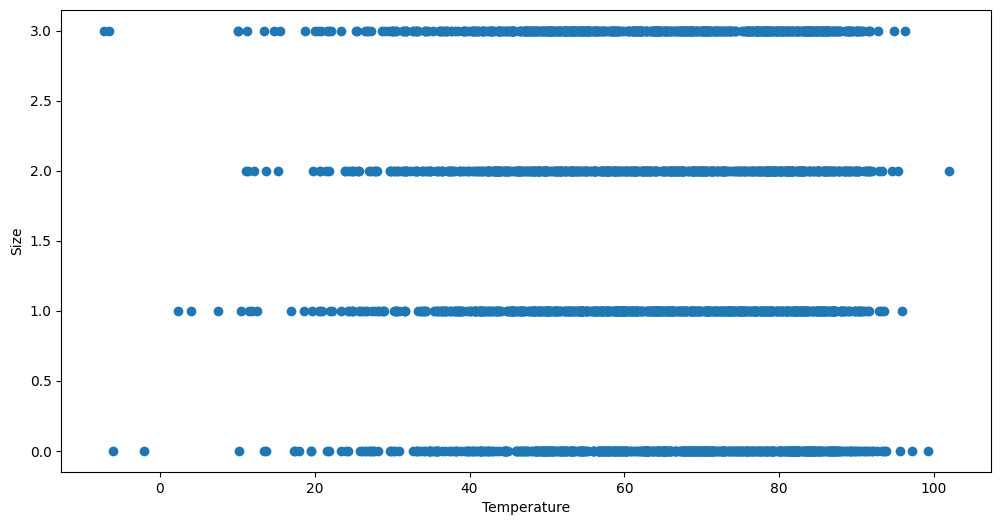

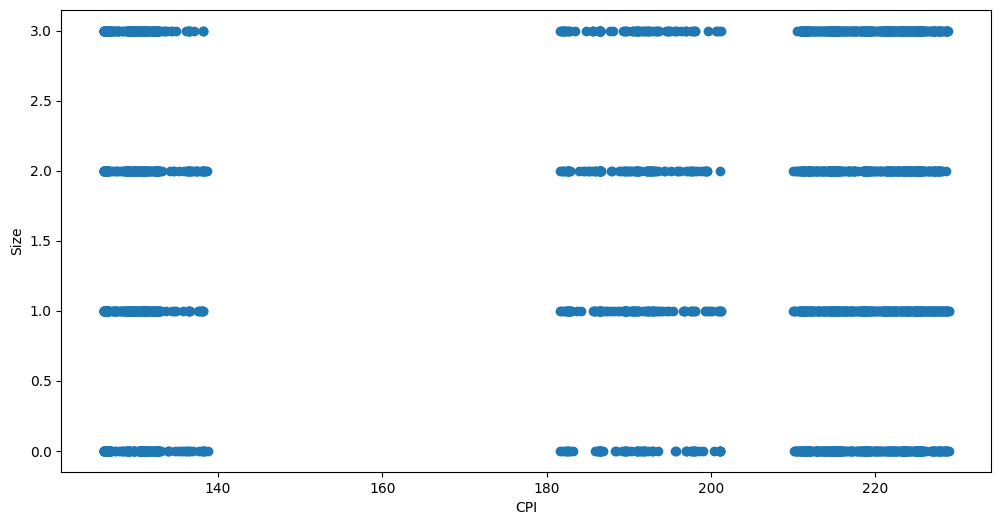

In [ ]:
#scatter plot between all the columns with the target column respectively
#using the matplotlib.pyplot library
data_columns=Dataset.columns[:-1]
for i in data_columns:
  plt.rcParams["figure.figsize"] = (12,6)
  plt.scatter(Dataset[i], Dataset['Size'])
  plt.xlabel(i)
  plt.ylabel('Size')
  plt.show()

In [ ]:
#correlation to understand the dependency of factors on target sales
Dataset.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,CPI,Size
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dept,NaN,1.000000,-0.450760,0.004112,-0.151252,-0.495702,-0.005162
Weekly_Sales,NaN,-0.450760,1.000000,0.026115,0.103376,0.192901,0.006232
IsHoliday,NaN,0.004112,0.026115,1.000000,-0.007529,0.001793,0.027909
Temperature,NaN,-0.151252,0.103376,-0.007529,1.000000,0.114602,-0.026674
CPI,NaN,-0.495702,0.192901,0.001793,0.114602,1.000000,-0.017738
Size,NaN,-0.005162,0.006232,0.027909,-0.026674,-0.017738,1.000000


From the heat map, plotting and correlation table we can conclude that,

1. Store has no correlation with the sales and hence can be dropped.
2. Department, Date, Product_Category column also has negative correlation
3. Date is less corelated and we can drop it too

In [ ]:
# Split dataset into training and testing sets
X = Dataset.drop(["Store","Dept","Date","Product_Category","Size"], axis=1)

y = Dataset["Size"]

In [ ]:
# Scale the X_variable using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training (75%) and testing sets (25%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [ ]:
#Create SVC_model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
SVC_model = SVC()
#SVC_model = SVC(kernel='linear',C=1, gamma=10, probability=True, random_state=42)

In [ ]:
# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],                 # Values for C (cost)
    'kernel': ['linear', 'rbf'],        # Kernel functions to try
    'gamma': [0.1, 1, 'scale', 'auto']  # Values for gamma
}

In [ ]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(SVC_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)  # X_train is the training feature data, y_train is the corresponding target labels

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [ ]:
# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# Fit the SVM model with the best hyperparameter values
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [ ]:
# Make predictions on test data
y_pred = best_svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

# Compute the evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute the ROC curve and AUC score
#y_prob = best_svm_model.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_prob, multi_class='ovo')

# Print the evaluation metrics
print('Accuracy: {:.2f}'.format(acc))
print('Precision: {:.2f}'.format(prec))
print('Recall: {:.2f}'.format(rec))
print('F1 score: {:.2f}'.format(f1))
print('AUC score: {:.2f}'.format(auc_score))

Accuracy: 0.26
Precision: 0.13
Recall: 0.26
F1 score: 0.13
AUC score: 0.48


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


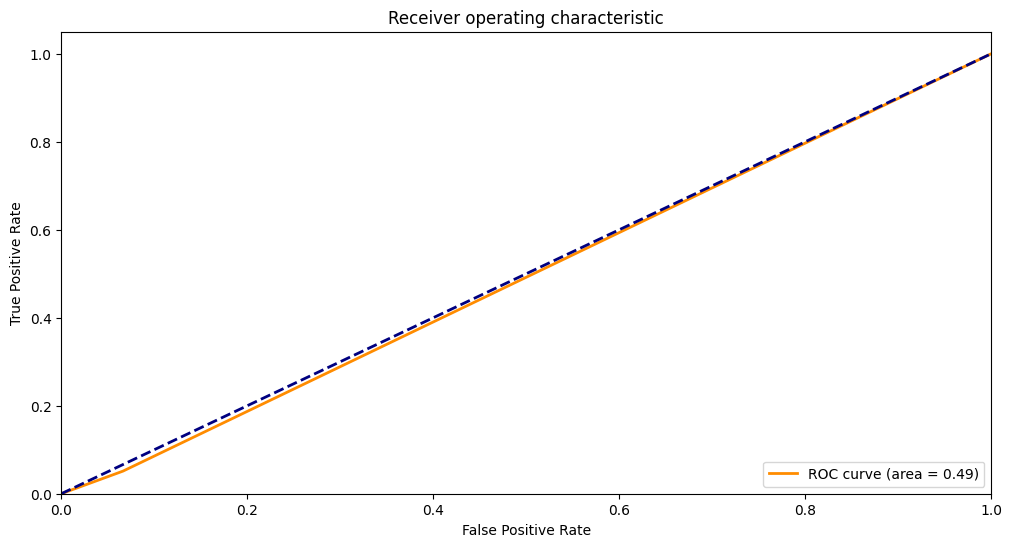

In [ ]:
#Let plot the AUC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Let's calculate the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import pandas as pd

In [ ]:
# Train a decision tree classifier
DT_Model = DecisionTreeClassifier(random_state=42)
# Define hyperparameter values to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

#DT_Model.fit(X_train, y_train)


In [ ]:
# Perform Grid Search with cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

grid_search = GridSearchCV(DT_Model, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Print the best hyperparameter values and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score:  0.2508428346936374


In [ ]:
# Evaluate the performance of the MLP classifier with the best hyperparameters

# 1. Creat a new MLP with best parameters
DT_Model_2 = DecisionTreeClassifier(**grid_search.best_params_)

# 2. Train new MLP on train dataset
DT_Model_2.fit(X_train, y_train)

# 3. Make prediction with new MLP

y_pred = DT_Model_2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred,average='weighted')

# Calculate precision
precision = precision_score(y_test, y_pred,average='weighted')

# Calculate F1-Score
f1_score = f1_score(y_test, y_pred,average='weighted')

auc_score = roc_auc_score(y_test, y_prob, multi_class='ovo')

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1_score)
print("AUC:", auc_score)

Accuracy: 0.24702380952380953
Recall: 0.24702380952380953
Precision: 0.20554493958377953
F1-Score: 0.1481306441083669
AUC: 0.482465046838803


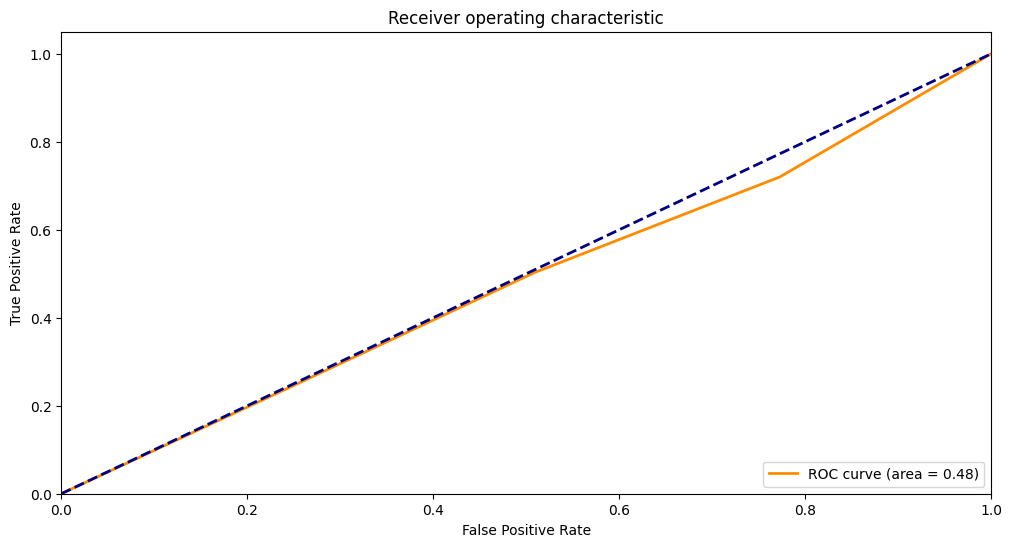

In [ ]:
#Let plot the AUC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Let's calculate the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()